## ДЗ №1

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовы

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных

from sklearn.preprocessing import StandardScaler, MinMaxScaler # нормализация и масштабирование данных

from sklearn.linear_model import LinearRegression # Простая линейная регрессия
from sklearn.preprocessing import PolynomialFeatures # для полиномиальной регрессии
from sklearn.svm import SVR # метод опорных векторов
from sklearn.tree import DecisionTreeRegressor # Дерево решений
from sklearn.ensemble import RandomForestRegressor # Лес деревье решений

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

import gc

from sklearn.preprocessing import LabelEncoder

In [ ]:
def calculate(data, alpha):

  df = pd.DataFrame(data=data, columns=['t', 'a'])
  t = df['t'].values.reshape((-1, 1))
  a = df['a'].values.reshape((-1, 1))
  X_train, X_test, y_train, y_test = train_test_split(a, t, test_size=1/3, shuffle=True, random_state=1)
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  alpha_pred = regressor.predict([[alpha]])
  alpha_pred_round = round(alpha_pred[0][0], 2)
  y_pred = regressor.predict(X_test)

  print(f'Коэффициенты модели: {regressor.coef_, regressor.intercept_}')
  print(f'Значение при альфа: {alpha_pred_round}')
  print(f'Оценка точности модели: {regressor.score(X_train, y_train), regressor.score(X_test, y_test)}')
  print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
  print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
  print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
  print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')


  plt.scatter(a, t, color = 'red')
  plt.plot(a, regressor.predict(a), color = 'blue')
  plt.show()

1. Построить функцию линейной регрессии. Найти значение при $\alpha=20000$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
t & 0 & 100 & 150 & 200 & 250 & 300 & 360
\\
\hline
\alpha & 18179 & 18216 & 18261 & 18323 & 18403 & 18500 & 18641
\end{array}
$$

Коэффициенты модели: (array([[0.93920603]]), array([-17048.1046266]))
Значение при альфа: 1736.02
Оценка точности модели: (0.939884972403827, 0.6394909281728258)
Средняя абсолютная ошибка: 62.14196869162333
средняя квадратичная ошибка: 4574.459555851477
Коэффициент детерминации: 0.6394909281728258
Медианная абсолютная ошибка: 47.2633440528989


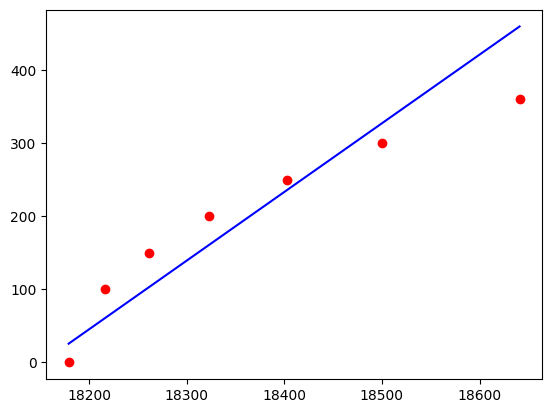

In [ ]:
data = np.array([
    [0, 18179],
    [100, 18216],
    [150, 18261],
    [200, 18323],
    [250, 18403],
    [300, 18500],
    [360, 18641],
])

alpha = 20000

calculate(data, alpha)

2. Построить функцию линейной регрессии. Найти значение при $S=100$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c|c}
\theta & 273 & 283 & 288 & 294 & 313 & 333 & 353 & 373
\\
\hline
S & 29,4 & 33,3 & 35,2 & 37,2 & 45,8 & 55,2 & 65,6 & 77,3
\end{array}
$$

Коэффициенты модели: (array([[2.19392236]]), array([210.87546109]))
Значение при альфа: 430.27
Оценка точности модели: (0.9962383864950465, 0.9889347860764158)
Средняя абсолютная ошибка: 2.833421160489498
средняя квадратичная ошибка: 18.8723370807797
Коэффициент детерминации: 0.9889347860764158
Медианная абсолютная ошибка: 0.9330757070085838


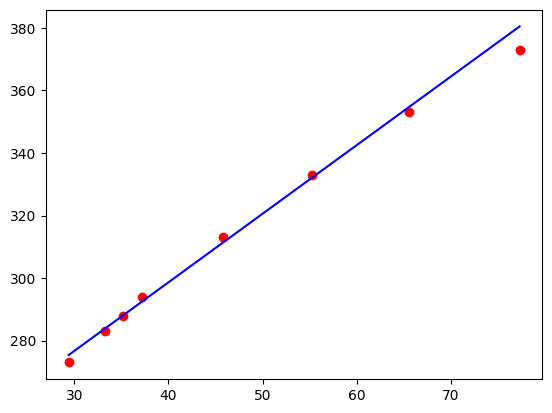

In [ ]:
data = np.array([
    [273, 29.4],
    [283, 33.3],
    [288, 35.2],
    [294, 37.2],
    [313, 45.8],
    [333, 55.2],
    [353, 65.6],
    [373, 77.3],
])

alpha = 100

calculate(data, alpha)

3. Построить функцию линейной регрессии. Найти значение при $P=20$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
\nu & 3,33 & 1,63 & 0,87 & 0,43 & 0,27 & 0,17 & 0,12
\\
\hline
P & 0,48 & 1,04 & 2,03 & 4,25 & 7,16 & 11,49 & 17,59
\end{array}
$$

Коэффициенты модели: (array([[-0.26549501]]), array([2.60181835]))
Значение при альфа: -2.71
Оценка точности модели: (0.6569759024333078, -4.8727410427932085)
Средняя абсолютная ошибка: 1.3589353151834878
средняя квадратичная ошибка: 2.231772101617925
Коэффициент детерминации: -4.8727410427932085
Медианная абсолютная ошибка: 1.1928634756825445


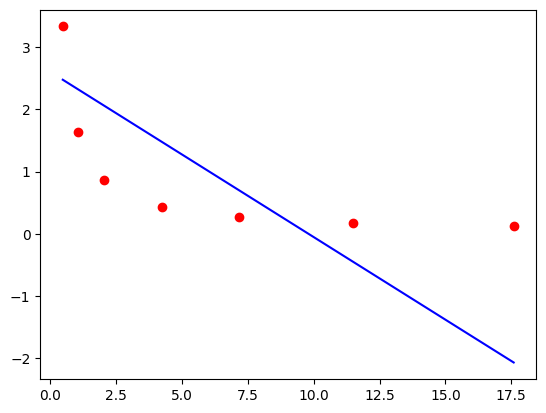

In [ ]:
data = np.array([
    [3.33, 0.48],
    [1.63, 1.04],
    [0.87, 2.03],
    [0.43, 4.25],
    [0.27, 7.16],
    [0.17, 11.49],
    [0.12, 17.59],
])

alpha = 20

calculate(data, alpha)

4. Построить функцию линейной регрессии. Найти значение при $S=1$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
V & 2,40 & 3,50 & 5,20 & 6,89 & 10,00 & 12,55 & 13,67
\\
\hline
S & 0,014 & 0,028 & 0,056 & 0,119 & 0,226 & 0,315 & 0,566
\end{array}
$$


Коэффициенты модели: (array([[33.30893147]]), array([2.34744505]))
Значение при альфа: 35.66
Оценка точности модели: (0.9894267033251336, 0.02737531685837069)
Средняя абсолютная ошибка: 2.912486640959892
средняя квадратичная ошибка: 19.242817395029096
Коэффициент детерминации: 0.02737531685837069
Медианная абсолютная ошибка: 0.9872547906594376


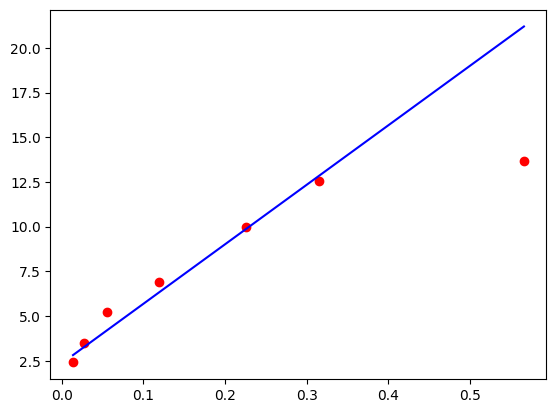

In [ ]:
data = np.array([
    [2.4, 0.014],
    [3.5, 0.028],
    [5.2, 0.056],
    [6.89, 0.119],
    [10.0, 0.226],
    [12.55, 0.315],
    [13.67, 0.566],
])

alpha = 1

calculate(data, alpha)

# ДЗ №2
В папке `practice_4` есть ноутбук EDA_AUTO. В этом ноутбуке проведен разведочный анализ данных, поиск и замена пропусков, визуализация данных, поиск выбросов/аномалий. Выполнить следующие задания:

1. Изучить ноутбук самостоятельно.
2. Столбец `price` - отклик, таргет. Остальные предикторы.
3. Столбец `make` не использовать для моделирования.  
4. Построить модель линейной регрессии и полиномиальной регрессии `price~horsepower`. Т.е. `price` - целевой отклик, `horsepower` - предиктор.
5. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя только числовые предикторы.
6. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя совместно с категориальными и числовыми предикторами.
7. Сравнить между собой модели. Рассчитать метрики и сделать визуализации
8. Использовать масштабирование признаков StandardScaler, и преобразование категориальных переменных


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
df = pd.read_csv(url, names=columns, na_values="?")

4. Построить модель линейной регрессии и полиномиальной регрессии `price~horsepower`. Т.е. `price` - целевой отклик, `horsepower` - предиктор.

In [ ]:
df.dropna(inplace=True)
y = df['price'].values.reshape((-1, 1))
X = df['horsepower'].values.reshape((-1, 1))

regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/3, random_state=0, shuffle=True)
regressor.fit(X_train, y_train)

print(f'Коэффициенты: {regressor.coef_, regressor.intercept_}')
y_pred = regressor.predict(X_test)
print(f'Предсказание модели: {y_pred}')
print(f'Оценка точности модели: {regressor.score(X_train, y_train), regressor.score(X_test, y_test)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')


Коэффициенты: (array([[138.40598698]]), array([-1669.49636274]))
Предсказание модели: [[15077.62806195]
 [ 9956.60654366]
 [20475.46155421]
 [15354.44003592]
 [ 6911.67483008]
 [ 8018.92272592]
 [ 7880.51673894]
 [14385.59812705]
 [ 7742.11075196]
 [17984.15378855]
 [14385.59812705]
 [11063.85443951]
 [ 5942.83292121]
 [14385.59812705]
 [ 7880.51673894]
 [ 7742.11075196]
 [15354.44003592]
 [ 5527.61496027]
 [12447.91430932]
 [10233.41851762]
 [ 7880.51673894]
 [10510.23049158]
 [ 7742.11075196]
 [10095.01253064]
 [ 7880.51673894]
 [ 4973.99101234]
 [ 8849.35864781]
 [10510.23049158]
 [ 8018.92272592]
 [14108.78615309]
 [ 6358.05088215]
 [18122.55977553]
 [10095.01253064]
 [14385.59812705]
 [ 7742.11075196]
 [20475.46155421]
 [ 9679.7945697 ]
 [ 8849.35864781]
 [ 6911.67483008]
 [10510.23049158]
 [ 6911.67483008]
 [20475.46155421]
 [ 7880.51673894]
 [10233.41851762]
 [13001.53825724]
 [ 9679.7945697 ]
 [ 7742.11075196]
 [ 9679.7945697 ]
 [18399.3717495 ]
 [13693.56819214]
 [12309.508322

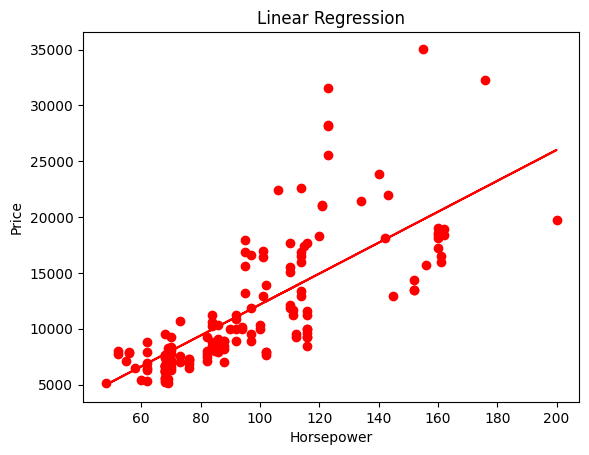

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['wheel-base', 'curb-weight', 'horsepower']], df['price'], test_size=1/3, random_state=0, shuffle=True)

Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя только числовые предикторы.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f'Оценка точности модели: {regressor.score(X_test, y_test), regressor.score(X_train, y_train)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')

Оценка точности модели: (0.8244361699356269, 0.799582281095247)
Средняя абсолютная ошибка: 1812.067968590325
средняя квадратичная ошибка: 5766570.5319267465
Коэффициент детерминации: 0.8244361699356269
Медианная абсолютная ошибка: 1433.1873816974985


In [ ]:
poly_regressor = PolynomialFeatures(degree = 3)
X_train_poly = poly_regressor.fit_transform(X_train)
X_test_poly = poly_regressor.fit_transform(X_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_train)
y_pred = lin_reg_2.predict(X_test_poly)
print(f'Оценка точности модели: {lin_reg_2.score(X_test_poly, y_test), lin_reg_2.score(X_test_poly, y_test)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')

Оценка точности модели: (0.754136296524598, 0.754136296524598)
Средняя абсолютная ошибка: 1957.2434119826253
средняя квадратичная ошибка: 8075640.562248924
Коэффициент детерминации: 0.754136296524598
Медианная абсолютная ошибка: 935.0052373567596


In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train.values.reshape((-1, 1)))

svr_regressor = SVR()
svr_regressor.fit(X_train_sc,y_train_sc)
y_pred = svr_regressor.predict(X_test)
print(f'Оценка точности модели: {svr_regressor.score(sc_X.fit_transform(X_test), sc_y.fit_transform(y_test.values.reshape((-1, 1)))), svr_regressor.score(sc_X.fit_transform(X_train), sc_y.fit_transform(y_train.values.reshape((-1, 1))))}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')

Оценка точности модели: (0.8461526458321188, 0.8182350522970726)
Средняя абсолютная ошибка: 10871.595601017685
средняя квадратичная ошибка: 151037596.43502906
Коэффициент детерминации: -3.598355082460242
Медианная абсолютная ошибка: 8194.388053847877


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [ ]:
dec_tree_regressor = DecisionTreeRegressor(random_state=0)
dec_tree_regressor.fit(X_train, y_train)
dec_tree_regressor.score(X_train, y_train), dec_tree_regressor.score(X_test, y_test)
y_pred = dec_tree_regressor.predict(X_test)
print(f'Оценка точности модели: {dec_tree_regressor.score(X_test, y_test), dec_tree_regressor.score(X_test, y_test)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')

Оценка точности модели: (0.8394174340204223, 0.8394174340204223)
Средняя абсолютная ошибка: 1485.8490566037735
средняя квадратичная ошибка: 5274495.849056603
Коэффициент детерминации: 0.8394174340204223
Медианная абсолютная ошибка: 1150.0


In [ ]:
rand_tree_regressor = RandomForestRegressor(n_estimators=10, random_state=0)
rand_tree_regressor.fit(X_train, y_train.ravel())
rand_tree_regressor.score(X_train, y_train.ravel()), rand_tree_regressor.score(X_test, y_test.ravel())
y_pred = rand_tree_regressor.predict(X_test)
print(f'Оценка точности модели: {rand_tree_regressor.score(X_test, y_test), rand_tree_regressor.score(X_test, y_test)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')

Оценка точности модели: (0.8974206034126465, 0.8974206034126465)
Средняя абсолютная ошибка: 1264.969433962264
средняя квадратичная ошибка: 3369323.426850314
Коэффициент детерминации: 0.8974206034126465
Медианная абсолютная ошибка: 703.8000000000002


6. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя совместно с категориальными и числовыми предикторами.

In [ ]:
df = pd.read_csv(url, names=columns, na_values="?")
df.dropna(inplace=True)

encoder = LabelEncoder()

X_cat = df.loc[:, ['horsepower', 'engine-size', 'fuel-system', 'body-style']]

encoder.fit(X_cat['fuel-system'].values)
X_cat['fuel-system'] = encoder.fit_transform(X_cat['fuel-system'])
X_cat['body-style'] = X_cat['body-style'].apply(lambda x: 0 if x == 'front' else 1)
y_cat = df['price']
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, train_size=1/3, random_state=0, shuffle=True)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_cat_train, y_cat_train)
y_cat_pred = regressor.predict(X_cat_test)
print(f'Оценка точности модели: {regressor.score(X_cat_test, y_cat_test), regressor.score(X_cat_train, y_cat_train)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_cat_test, y_cat_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_cat_test, y_cat_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_cat_test, y_cat_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_cat_test, y_cat_pred)}')

Оценка точности модели: (0.7260769699967637, 0.699899941611505)
Средняя абсолютная ошибка: 2259.0868483114814
средняя квадратичная ошибка: 9926578.569437366
Коэффициент детерминации: 0.7260769699967637
Медианная абсолютная ошибка: 1616.8192881768537


In [ ]:
poly_regressor = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly = poly_regressor.fit_transform(X_cat_train), poly_regressor.fit_transform(X_cat_test)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_poly, y_cat_train)
y_cat_pred = lin_reg_2.predict(X_test_poly)
print(f'Оценка точности модели: {lin_reg_2.score(X_test_poly, y_cat_test), lin_reg_2.score(X_train_poly, y_cat_train)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_cat_test, y_cat_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_cat_test, y_cat_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_cat_test, y_cat_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_cat_test, y_cat_pred)}')

Оценка точности модели: (0.7368114208174232, 0.7931923897401071)
Средняя абсолютная ошибка: 2331.4106721730986
средняя квадратичная ошибка: 9537577.434812877
Коэффициент детерминации: 0.7368114208174232
Медианная абсолютная ошибка: 1657.3133927724039


In [ ]:
svr_regressor = SVR()
sc_x, sc_y = StandardScaler(), StandardScaler()
sc_x.fit(X_cat_train.to_numpy())
sc_y.fit(y_cat_train.values.reshape((-1, 1)))
X_train_sc = sc_x.fit_transform(X_cat_train.to_numpy())
y_train_sc = sc_y.fit_transform(y_cat_train.values.reshape((-1, 1)))
svr_regressor.fit(X_train_sc, y_train_sc)

X_train, X_test, y_train, y_test = train_test_split(X_train_sc ,y_train_sc, test_size = 1/3, random_state = 0)
y_pred = svr_regressor.predict(X_test)
print(f'Оценка точности модели: {svr_regressor.score(X_train_sc, y_train_sc), svr_regressor.score(sc_x.fit_transform(X_cat_test), sc_y.fit_transform(y_cat_test.values.reshape((-1, 1))))}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}')


Оценка точности модели: (0.688092456686081, 0.6644172490593561)
Средняя абсолютная ошибка: 0.4529082971551245
средняя квадратичная ошибка: 0.677478312531963
Коэффициент детерминации: 0.6353364611649265
Медианная абсолютная ошибка: 0.18525764356463242


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dec_tree_regressor = DecisionTreeRegressor(random_state=0)
dec_tree_regressor.fit(X_cat_train, y_cat_train)
y_cat_pred = dec_tree_regressor.predict(X_cat_test)
print(f'Оценка точности модели: {dec_tree_regressor.score(X_cat_test, y_cat_test), dec_tree_regressor.score(X_cat_train, y_cat_train)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_cat_test, y_cat_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_cat_test, y_cat_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_cat_test, y_cat_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_cat_test, y_cat_pred)}')

Оценка точности модели: (0.6137029182440714, 0.9816900372952972)
Средняя абсолютная ошибка: 2456.448113207547
средняя квадратичная ошибка: 13998853.375524107
Коэффициент детерминации: 0.6137029182440714
Медианная абсолютная ошибка: 1185.0


In [ ]:
rand_tree_regressor = RandomForestRegressor(random_state=0, n_estimators=10)
rand_tree_regressor.fit(X_cat_train, y_cat_train)
y_cat_pred = rand_tree_regressor.predict(X_cat_test)
print(f'Оценка точности модели: {rand_tree_regressor.score(X_cat_test, y_cat_test), rand_tree_regressor.score(X_cat_train, y_cat_train)}')
print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_cat_test, y_cat_pred)}')
print(f'средняя квадратичная ошибка: {mean_squared_error(y_cat_test, y_cat_pred)}')
print(f'Коэффициент детерминации: {r2_score(y_cat_test, y_cat_pred)}')
print(f'Медианная абсолютная ошибка: {median_absolute_error(y_cat_test, y_cat_pred)}')

Оценка точности модели: (0.7184747849561519, 0.8939995836844433)
Средняя абсолютная ошибка: 2242.06
средняя квадратичная ошибка: 10202070.875083016
Коэффициент детерминации: 0.7184747849561519
Медианная абсолютная ошибка: 1300.1750000000002
